# YouTube Spam stack model

In [1]:
import pandas as pd
import zipfile
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
z= zipfile.ZipFile("youtube+spam+collection (1).zip")
Psy = pd.read_csv(z.open("Youtube01-Psy.csv"))
Katy = pd.read_csv(z.open("Youtube02-KatyPerry.csv"))
LMFAO = pd.read_csv(z.open("Youtube03-LMFAO.csv"))
Eminem = pd.read_csv(z.open("Youtube04-Eminem.csv"))
Shakira = pd.read_csv(z.open("Youtube05-Shakira.csv"))


In [3]:
data = pd.concat([Psy, Katy, LMFAO, Eminem, Shakira])
data.drop(["COMMENT_ID", "AUTHOR", "DATE"], axis=1, inplace=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data["CONTENT"], data["CLASS"])


In [5]:
tfidf_vect = TfidfVectorizer(use_idf=True, lowercase= True)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_train_tfidf.shape

(1467, 3674)

In [6]:
def save_tfidf_vocabulary(tfidf_vectorizer, filename):
    with open(filename, 'wb') as vocab_file:
        pickle.dump(tfidf_vectorizer.vocabulary_, vocab_file)

# Save the TF-IDF vocabulary to a file
save_tfidf_vocabulary(tfidf_vect, 'tfidf_vocabulary.pkl')


In [7]:
import joblib

# Save the TF-IDF vectorizer to a pickle file
joblib.dump(tfidf_vect, 'tfidf_vectorizer.pkl')

# Verify that the vectorizer has been saved
print("TF-IDF vectorizer saved to tfidf_vectorizer.pkl")


TF-IDF vectorizer saved to tfidf_vectorizer.pkl


# Classification models

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score


# Decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_tfidf, y_train)

# Make predictions
y_train_pred = dt.predict(X_train_tfidf)
y_test_pred = dt.predict(tfidf_vect.transform(X_test))

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred)
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred)
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred)
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred)
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.9161554192229039
- MCC: 0.8435367341046734
- F1 score: 0.9157620556171202
----------------------------------
Model performance for Test set
- Accuracy: 0.8916155419222904
- MCC: 0.7980770702431769
- F1 score: 0.8911659024552465


# Random forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train_tfidf, y_train)

# Make predictions
y_train_pred = rf.predict(X_train_tfidf)
y_test_pred = rf.predict(tfidf_vect.transform(X_test))

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred)
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred)
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred)
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred)
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.9979550102249489
- MCC: 0.9959168829082481
- F1 score: 0.9979550900737575
----------------------------------
Model performance for Test set
- Accuracy: 0.9304703476482618
- MCC: 0.8629073874858098
- F1 score: 0.9305029207687584


# Neural network

In [11]:
from sklearn.neural_network import MLPClassifier

# Create and train the MLP classifier
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train_tfidf, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train_tfidf)
y_test_pred = mlp.predict(tfidf_vect.transform(X_test))

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred)
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred)
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred)
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred)
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 0.9897750511247444
- MCC: 0.9795509341464985
- F1 score: 0.9897754503687871
----------------------------------
Model performance for Test set
- Accuracy: 0.9447852760736196
- MCC: 0.889456863616755
- F1 score: 0.944799153710843


# Support vector machine (Radial basis function kernel)

In [12]:
from sklearn.svm import SVC

# Create and train the SVM classifier with RBF kernel
svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train_tfidf, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train_tfidf)
y_test_pred = svm_rbf.predict(tfidf_vect.transform(X_test))

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred)
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred)
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred)
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred)
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)

Model performance for Training set
- Accuracy: 0.9993183367416496
- MCC: 0.9986369540612409
- F1 score: 0.9993183266009871
----------------------------------
Model performance for Test set
- Accuracy: 0.9325153374233128
- MCC: 0.8667519617091529
- F1 score: 0.9325492128568253


# Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score

# Create and train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

# Make predictions
y_train_pred = naive_bayes.predict(X_train_tfidf)
y_test_pred = naive_bayes.predict(tfidf_vect.transform(X_test))

# Training set performance
naive_bayes_train_accuracy = accuracy_score(y_train, y_train_pred)
naive_bayes_train_mcc = matthews_corrcoef(y_train, y_train_pred)
naive_bayes_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Test set performance
naive_bayes_test_accuracy = accuracy_score(y_test, y_test_pred)
naive_bayes_test_mcc = matthews_corrcoef(y_test, y_test_pred)
naive_bayes_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % naive_bayes_train_accuracy)
print('- MCC: %s' % naive_bayes_train_mcc)
print('- F1 score: %s' % naive_bayes_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % naive_bayes_test_accuracy)
print('- MCC: %s' % naive_bayes_test_mcc)
print('- F1 score: %s' % naive_bayes_test_f1)



Model performance for Training set
- Accuracy: 0.9679618268575324
- MCC: 0.9359075586942647
- F1 score: 0.9679591455808286
----------------------------------
Model performance for Test set
- Accuracy: 0.9141104294478528
- MCC: 0.8295172437077484
- F1 score: 0.9138434714666049


# Build Stacked model

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define a list of estimators
estimator_list = [
    ('svm_rbf', svm_rbf),
    ('dt', dt),
    ('rf', rf),
    ('mlp', mlp),
    ('naive_bayes', naive_bayes)
]

# Build the stacked model with a final Logistic Regression estimator
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train the stacked model
stack_model.fit(X_train_tfidf, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train_tfidf)
y_test_pred = stack_model.predict(tfidf_vect.transform(X_test))

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred)
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred)
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.9993183367416496
- MCC: 0.9986369540612409
- F1 score: 0.9993183266009871
----------------------------------
Model performance for Test set
- Accuracy: 0.9488752556237219
- MCC: 0.8975510972393719
- F1 score: 0.9488799688256824


In [15]:
# Add Naive Bayes metrics to the dictionaries
acc_train_list = {
    'svm_rbf': svm_rbf_train_accuracy,
    'dt': dt_train_accuracy,
    'rf': rf_train_accuracy,
    'mlp': mlp_train_accuracy,
    'naive_bayes': naive_bayes_train_accuracy,  # Add Naive Bayes accuracy
    'stack': stack_model_train_accuracy
}

mcc_train_list = {
    'svm_rbf': svm_rbf_train_mcc,
    'dt': dt_train_mcc,
    'rf': rf_train_mcc,
    'mlp': mlp_train_mcc,
    'naive_bayes': naive_bayes_train_mcc,  # Add Naive Bayes MCC
    'stack': stack_model_train_mcc
}

f1_train_list = {
    'svm_rbf': svm_rbf_train_f1,
    'dt': dt_train_f1,
    'rf': rf_train_f1,
    'mlp': mlp_train_f1,
    'naive_bayes': naive_bayes_train_f1,  # Add Naive Bayes F1 score
    'stack': stack_model_train_f1
}


In [16]:
mcc_train_list

{'svm_rbf': 0.9986369540612409,
 'dt': 0.8435367341046734,
 'rf': 0.9959168829082481,
 'mlp': 0.9795509341464985,
 'naive_bayes': 0.9359075586942647,
 'stack': 0.9986369540612409}

In [17]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])

# Concatenate the DataFrames into a single DataFrame
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)

# Display the resulting DataFrame
print(df)

             Accuracy       MCC        F1
svm_rbf      0.999318  0.998637  0.999318
dt           0.916155  0.843537  0.915762
rf           0.997955  0.995917  0.997955
mlp          0.989775  0.979551  0.989775
naive_bayes  0.967962  0.935908  0.967959
stack        0.999318  0.998637  0.999318


In [18]:
import joblib

# Save the stacking model to a pickle file
joblib.dump(stack_model, 'stacked_model.pkl')

# Verify that the model has been saved
print("Stacking model saved to stacked_model.pkl")


Stacking model saved to stacked_model.pkl


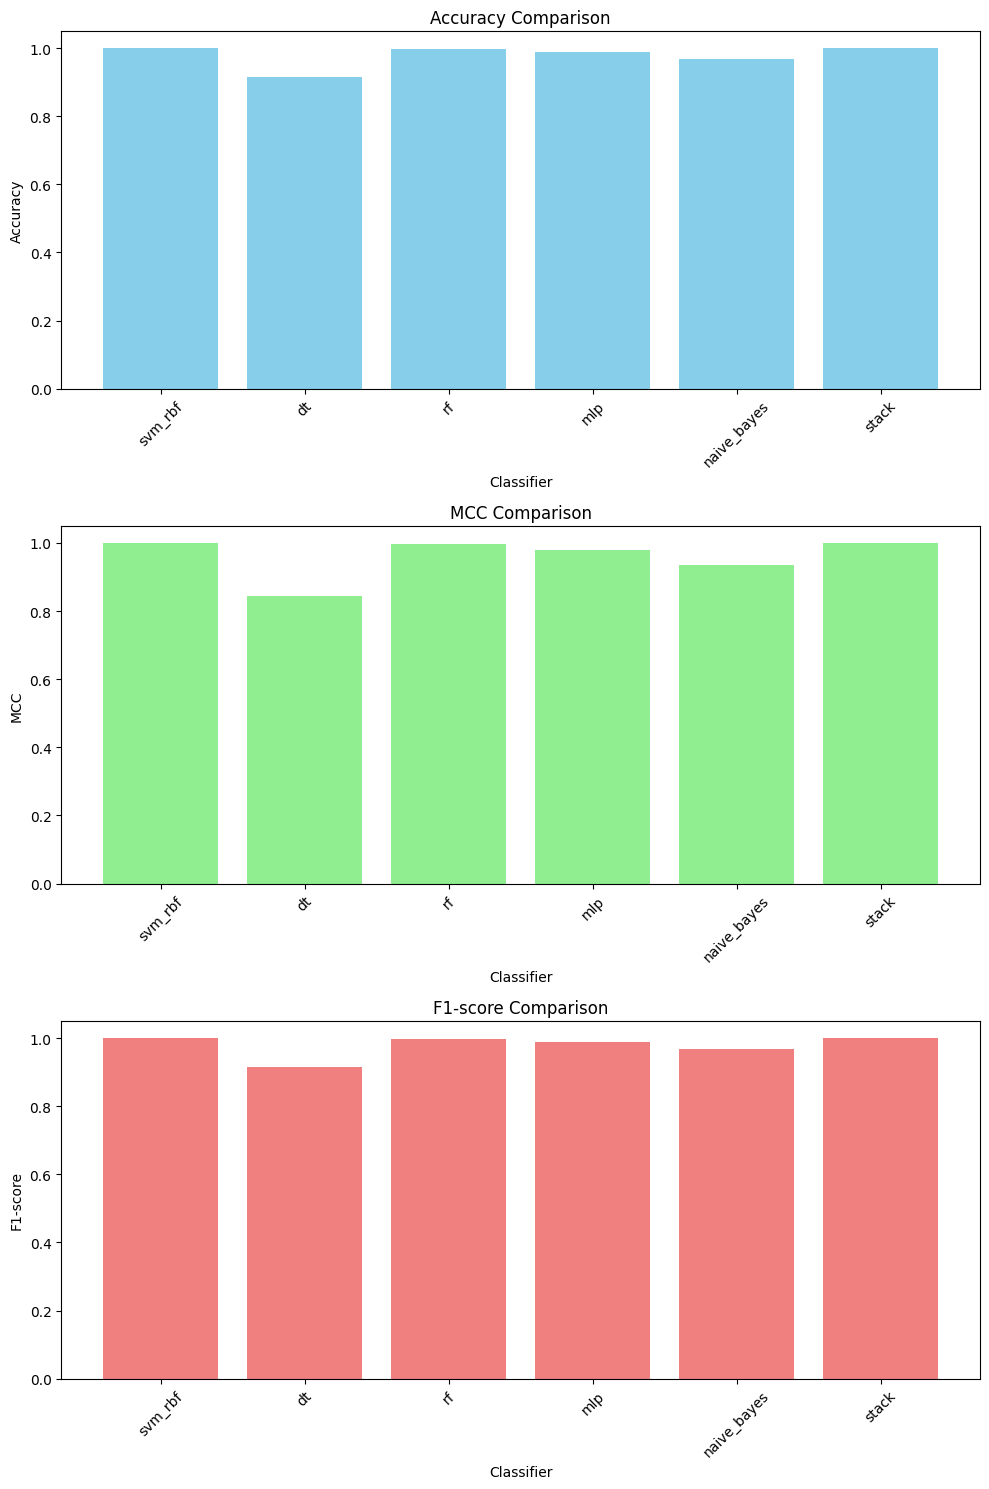

In [20]:
import matplotlib.pyplot as plt

# Increase the size of the plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot Accuracy
axes[0].bar(df.index, df['Accuracy'], color='skyblue')
axes[0].set_xlabel('Classifier')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison')
axes[0].tick_params(axis='x', rotation=45)

# Plot MCC
axes[1].bar(df.index, df['MCC'], color='lightgreen')
axes[1].set_xlabel('Classifier')
axes[1].set_ylabel('MCC')
axes[1].set_title('MCC Comparison')
axes[1].tick_params(axis='x', rotation=45)

# Plot F1-score
axes[2].bar(df.index, df['F1'], color='lightcoral')
axes[2].set_xlabel('Classifier')
axes[2].set_ylabel('F1-score')
axes[2].set_title('F1-score Comparison')
axes[2].tick_params(axis='x', rotation=45)

# Adjust spacing between plots
plt.tight_layout()

# Show the plots
plt.show()




In [21]:
# Load the model from the pickle file
loaded_model = joblib.load('stacked_model.pkl')

# The comment you want to make a prediction for
comment = ["subscribe here"]

# Transform the comment into a TF-IDF vector
comment_tfidf = tfidf_vect.transform(comment)

# Use the loaded model to make predictions
predictions = loaded_model.predict(comment_tfidf)

# Print the predictions
print(predictions)


[1]


In [22]:
import joblib

# Save the stacking model to a pickle file
joblib.dump(tfidf_vect, 'tfidf_vect.pkl')

# Verify that the model has been saved
print("tfidf_vect saved to tfidf_vect.pkl")

tfidf_vect saved to tfidf_vect.pkl
